In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("datasets\clean_data.csv")

In [62]:
# Function to detect outliers in the AQI column using IQR method
def detect_outliers_iqr(df):
    if 'AQI' not in df.columns:
        raise ValueError("The dataset does not contain 'AQI' column.")
    
    Q1 = df['AQI'].quantile(0.25)
    Q3 = df['AQI'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    is_outlier = (df['AQI'] < lower_bound) | (df['AQI'] > upper_bound)
    outliers = df[is_outlier]
    return outliers




In [63]:
grouped = df.groupby('City')
outliers_list = [detect_outliers_iqr(group) for city, group in grouped]
outliers_by_city = pd.concat(outliers_list)

In [64]:
outliers_by_city

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
32,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46,0.06,35.61,914.0
51,Ahmedabad,2015-02-21,239.96,118.127103,61.95,46.25,106.92,23.483476,61.95,84.87,33.55,22.14,53.98,15.44,1141.0
53,Ahmedabad,2015-02-23,238.41,118.127103,77.70,55.07,131.32,23.483476,77.70,89.07,37.30,50.61,163.64,28.46,1247.0
290,Ahmedabad,2015-10-18,179.43,118.127103,52.33,39.42,91.75,23.483476,52.33,39.15,112.01,31.75,102.65,14.97,969.0
298,Ahmedabad,2015-10-26,206.89,118.127103,145.32,55.67,201.00,23.483476,145.32,20.47,38.00,1.69,3.45,36.00,971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29005,Visakhapatnam,2019-01-23,118.46,137.700000,34.77,76.17,68.79,16.810000,1.09,19.40,30.27,5.57,9.22,3.82,302.0
29020,Visakhapatnam,2019-02-07,118.36,278.920000,58.10,85.31,92.62,22.250000,1.57,28.70,53.62,5.47,9.11,2.66,283.0
29283,Visakhapatnam,2019-10-28,40.46,61.360000,6.39,22.82,17.30,2.550000,0.58,20.81,28.22,2.73,6.20,1.17,284.0
29290,Visakhapatnam,2019-11-04,109.46,194.850000,24.05,61.03,51.98,16.760000,1.27,18.52,42.93,7.01,18.57,3.76,307.0


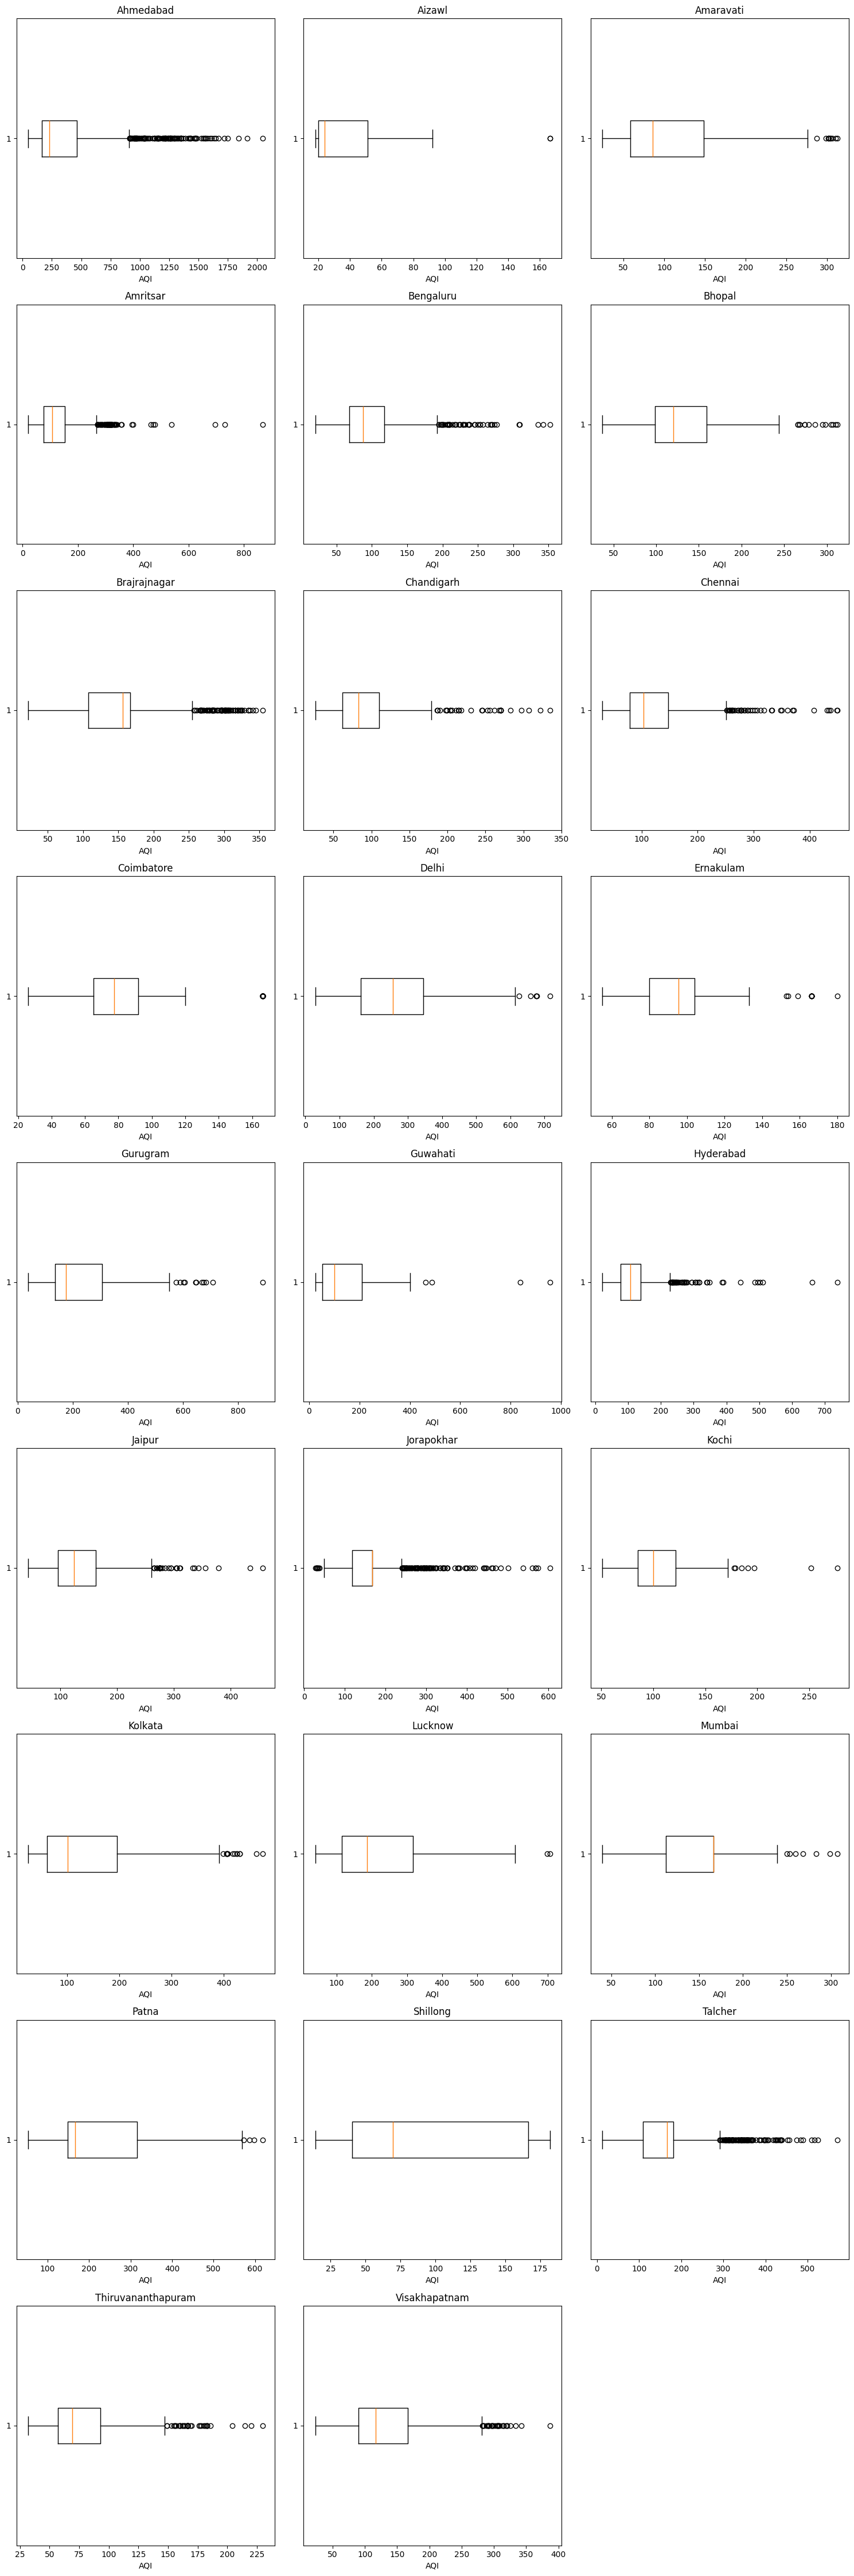

In [65]:
def plot_citywise_compact(df):
    cities = df['City'].unique()
    num_cities = len(cities)
    
    # Determine grid size for subplots
    cols = 3
    rows = (num_cities // cols) + (num_cities % cols > 0)
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
    axes = axes.flatten()
    
    for i, city in enumerate(cities):
        df_city = df[df['City'] == city]
        axes[i].boxplot(df_city['AQI'], vert=False)
        axes[i].set_title(f'{city}')
        axes[i].set_xlabel('AQI')
    
    # Remove any empty subplots
    for i in range(num_cities, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

plot_citywise_compact(df)

In [66]:
clean_data = df[~df.index.isin(outliers_by_city.index)]

In [67]:
clean_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000


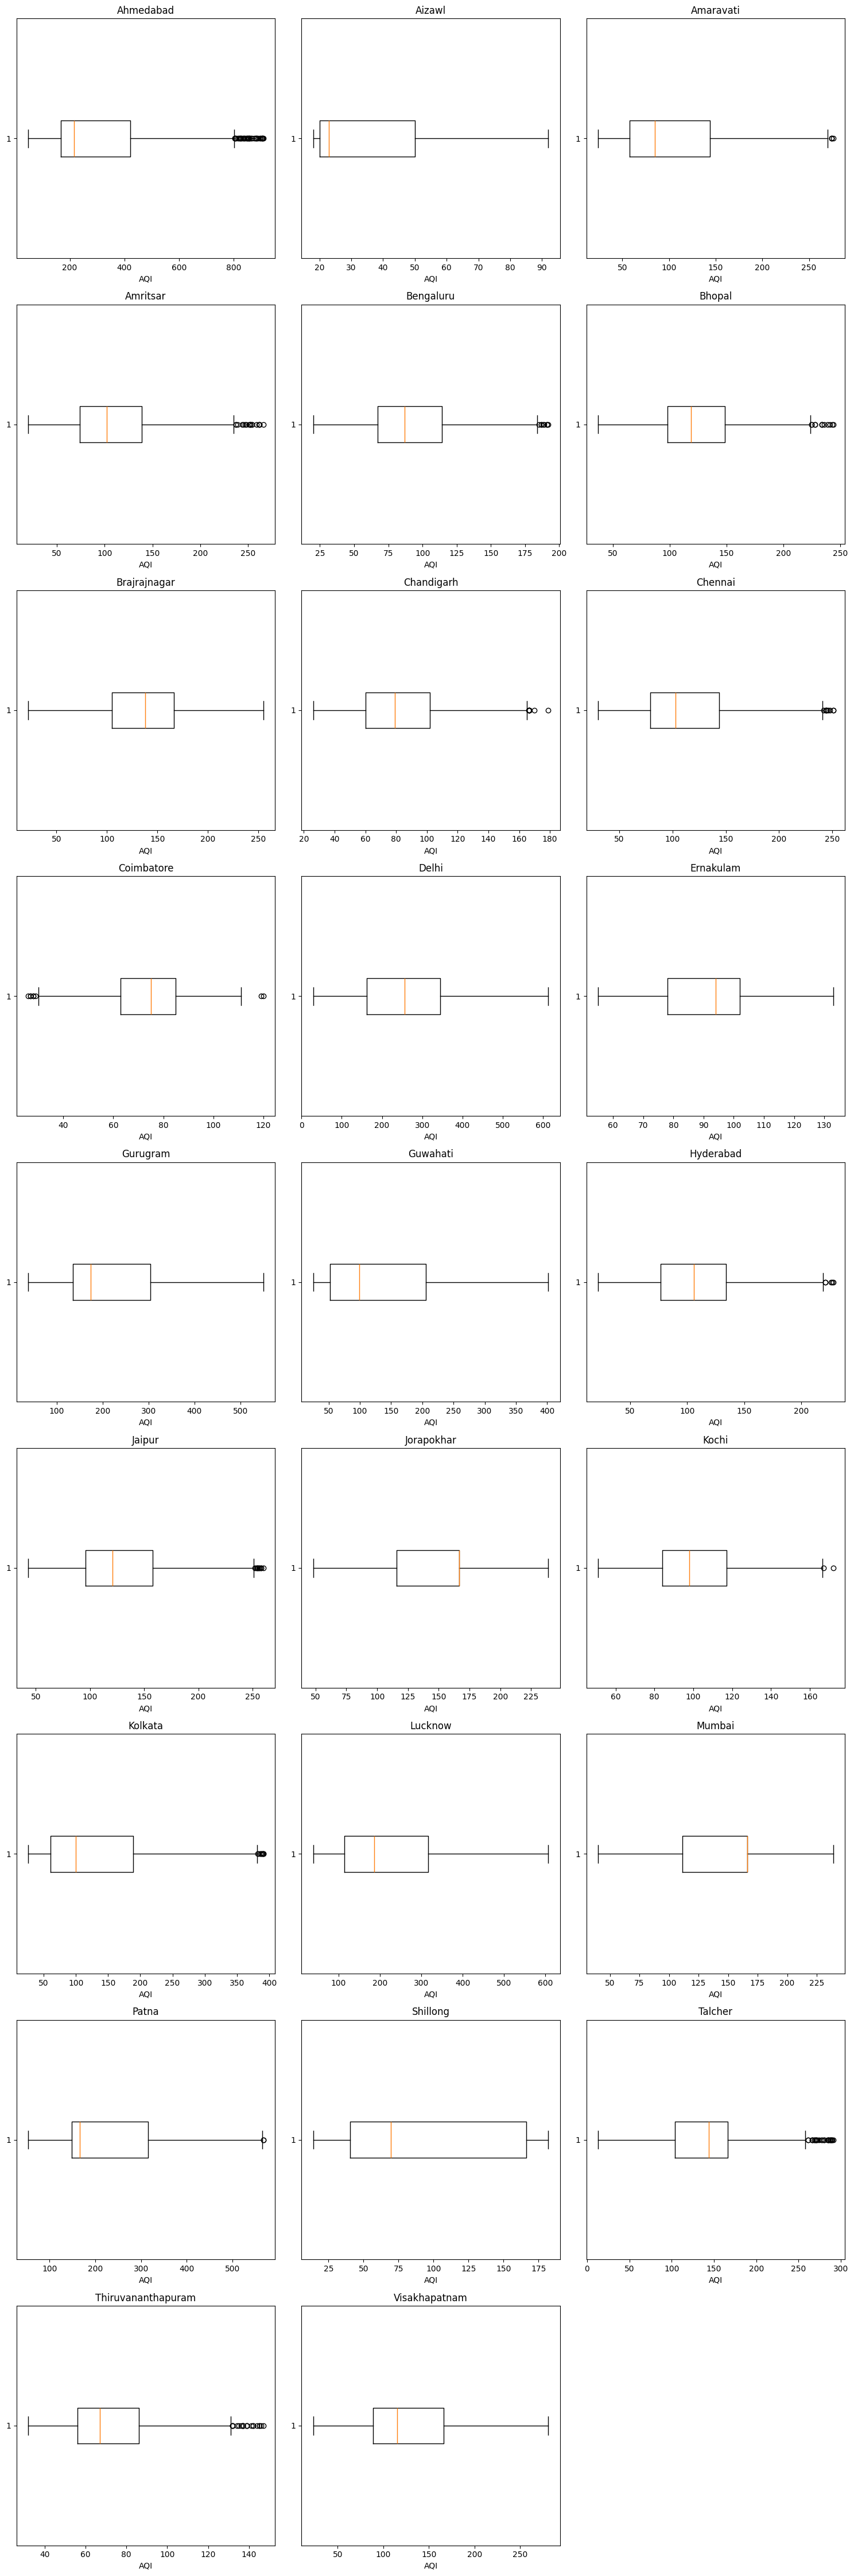

In [68]:
def plot_citywise_compact(df):
    cities = df['City'].unique()
    num_cities = len(cities)
    
    # Determine grid size for subplots
    cols = 3
    rows = (num_cities // cols) + (num_cities % cols > 0)
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
    axes = axes.flatten()
    
    for i, city in enumerate(cities):
        df_city = df[df['City'] == city]
        axes[i].boxplot(df_city['AQI'], vert=False)
        axes[i].set_title(f'{city}')
        axes[i].set_xlabel('AQI')
    
    # Remove any empty subplots
    for i in range(num_cities, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

plot_citywise_compact(clean_data)

In [69]:
clean_data.to_csv('transformed_data.csv', index=False)